In [8]:
import scanpy as sc
import numpy as np
import os
import re

TOTAL_DATA_PATH = "./raw_h5ad/merged_hasmeta_cells.h5ad"
SAVE_DIR = "./raw_h5ad"
DOWNSAMPLE_SET = [
    # paper
    "C3N-00242-T1_CPT0014450005_snATAC_ccRCC",
    "C3N-01200-T1_CPT0075130004_snATAC_ccRCC",
    "C3L-00004-T1_CPT0001540013_snATAC_ccRCC",
    "C3L-00610-T1_CPT0025110004_snATAC_ccRCC",
]

os.makedirs(SAVE_DIR, exist_ok=True)

adata = sc.read_h5ad(TOTAL_DATA_PATH)

pattern = '|'.join(map(re.escape, DOWNSAMPLE_SET))
mask = adata.obs['GEO.sample'].str.contains(pattern, na=False)

filtered_adata = adata[mask].copy()
n_sample = filtered_adata.shape[0]

output_path = os.path.join(SAVE_DIR, f"downsampled_paper_{n_sample}.h5ad")
filtered_adata.write(output_path)

print(f"✅ Saved downsampled data: {output_path}")

✅ Saved downsampled data: ./raw_h5ad/downsampled_paper_20642.h5ad


In [9]:
from epiagent.preprocessing import global_TFIDF
from epiagent.tokenization import tokenization
import numpy as np
import scanpy as sc
import os

CCRE_DOCFREQ_PATH = '../cCRE_document_frequency.npy'
DATA_PATH = "./raw_h5ad/downsampled_paper_20642.h5ad"
# DATA_PATH = "./raw_h5ad/downsampled_test_10000.h5ad"
# DATA_PATH = "./raw_h5ad/C3L-00004-T1_CPT0001540013_snATAC_ccRCC.h5ad"
SAVE_DIR = "./processed_h5ad" 

adata = sc.read_h5ad(DATA_PATH)
cCRE_document_frequency = np.load(CCRE_DOCFREQ_PATH)

# Apply TF-IDF
print("Applying TF-IDF...")
global_TFIDF(adata, cCRE_document_frequency)

# Tokenize the data
print("Tokenizing the data...")
tokenization(adata)

# Save the processed AnnData
os.makedirs(SAVE_DIR, exist_ok=True)
processed_output_path = os.path.join(SAVE_DIR, os.path.basename(DATA_PATH).replace('.h5ad', '_cellsentenced.h5ad'))
adata.write(processed_output_path)
print(f"Processed data saved at {processed_output_path}")


Applying TF-IDF...
Tokenizing the data...
Tokenization complete: 'cell_sentences' column added to adata.obs.
Processed data saved at ./processed_h5ad/downsampled_paper_20642_cellsentenced.h5ad


In [38]:
import scanpy as sc 
import pandas as pd

DATA_PATH = "./raw_h5ad/merged_hasmeta_cells.h5ad"
METADATA_PATH = "./temp/normal_metadata.tsv"
OUTPUT_PATH = "./raw_h5ad/normal_withmeta.h5ad"

adata = sc.read_h5ad(DATA_PATH)
adata.obs.index = adata.obs['Merged_barcode'].tolist()

print("Adding metadata...")
metadata = pd.read_csv(METADATA_PATH, sep='\t', index_col=0)
print(f"| For {metadata.shape} metadata entries")
metadata = metadata[metadata['cell_type.normal'].astype(str) == 'Proximal Tubule'] # Filter metadata for 'Proximal Tubule' cell type
print(f"| Selected {metadata.shape}")

adata = adata[adata.obs_names.isin(metadata.index)].copy()
metadata = metadata.loc[adata.obs_names]
adata.obs = adata.obs.join(metadata, how='left')
adata.obs = adata.obs.astype(str) 
print(f"| Final adata shape: {adata.shape}")

# Save AnnData
adata.write(OUTPUT_PATH)
print(f"Generated {OUTPUT_PATH}")



Adding metadata...
| For (24293, 1) metadata entries
| Selected (11471, 1)
| Final adata shape: (11001, 1355445)
Generated ./raw_h5ad/normal_withmeta.h5ad


In [37]:
metadata = pd.read_csv(METADATA_PATH, sep='\t', index_col=0)
metadata.head()
metadata.index

Index(['ccRCC_C3L-00088-T1_CGGACCATCTTAGTGG-1',
       'ccRCC_C3L-00088-N_AAACGAAAGAATATCG-1',
       'ccRCC_C3L-00088-N_AAACGAAAGACAACGC-1',
       'ccRCC_C3L-00088-N_AAACGAAAGATTCCGT-1',
       'ccRCC_C3L-00088-N_AAACGAAAGCAGGAGG-1',
       'ccRCC_C3L-00088-N_AAACGAAAGGCACCTC-1',
       'ccRCC_C3L-00088-N_AAACGAAAGGTTGTTC-1',
       'ccRCC_C3L-00088-N_AAACGAACATCTCACC-1',
       'ccRCC_C3L-00088-N_AAACGAAGTACGTATC-1',
       'ccRCC_C3L-00088-N_AAACGAAGTATTGTCG-1',
       ...
       'ccRCC_K1900070_TTGTTCAAGTAGTTCC-1',
       'ccRCC_K1900070_TTGTTCAGTAGCTGTT-1',
       'ccRCC_K1900070_TTGTTGTTCGAGTTAC-1',
       'ccRCC_K1900070_TTGTTGTTCTGGTACA-1',
       'ccRCC_K1900070_TTTGAGGCACCCTTTG-1',
       'ccRCC_K1900070_TTTGCGCAGGGTCCCT-1',
       'ccRCC_K1900070_TTTGCGCTCGTTCTAT-1',
       'ccRCC_K1900070_TTTGGTTAGTCATCTG-1',
       'ccRCC_K1900070_TTTGGTTGTACTTGAC-1',
       'ccRCC_K1900070_TTTGTGTCACGACGAA-1'],
      dtype='object', length=24293)

In [40]:
adata.obs.head()

,Merged_barcode,Sample,Case_ID,Piece_ID,Sample_type,data.type,Chemistry,Cancer,cell_type.harmonized.cancer,Aliquot,GEO.sample,cell_type.normal
ccRCC_C3L-00908-T1_ATCGAGTAGCTTTCCC-1,ccRCC_C3L-00908-T1_ATCGAGTAGCTTTCCC-1,CPT0086350004,C3L-00908,C3L-00908-T1,Tumor,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0086350004,C3L-00908-T1_CPT0086350004_snATAC_ccRCC,Proximal Tubule
ccRCC_C3L-00908-T1_CGCTATCAGATGGCAC-1,ccRCC_C3L-00908-T1_CGCTATCAGATGGCAC-1,CPT0086350004,C3L-00908,C3L-00908-T1,Tumor,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0086350004,C3L-00908-T1_CPT0086350004_snATAC_ccRCC,Proximal Tubule
ccRCC_C3L-00908-T1_GCCTAGGCAACTCCCT-1,ccRCC_C3L-00908-T1_GCCTAGGCAACTCCCT-1,CPT0086350004,C3L-00908,C3L-00908-T1,Tumor,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0086350004,C3L-00908-T1_CPT0086350004_snATAC_ccRCC,Proximal Tubule
ccRCC_C3L-00908-T1_TTGGTCCAGTACGCGA-1,ccRCC_C3L-00908-T1_TTGGTCCAGTACGCGA-1,CPT0086350004,C3L-00908,C3L-00908-T1,Tumor,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0086350004,C3L-00908-T1_CPT0086350004_snATAC_ccRCC,Proximal Tubule
ccRCC_C3L-00917-T1_AACCGATAGTTTGGAA-1,ccRCC_C3L-00917-T1_AACCGATAGTTTGGAA-1,CPT0023690004,C3L-00917,C3L-00917-T1,Tumor,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0023690004,C3L-00917-T1_CPT0023690004_snATAC_ccRCC,Proximal Tubule


In [32]:
NORMAL_SETS = [
    "C3N-00242-N_CPT0014470002_snATAC_ccRCC",
    "C3N-01200-N_CPT0075170013_snATAC_ccRCC",
    "C3L-00079-N_CPT0001270002_snATAC_ccRCC",
    "C3L-00088-N_CPT0000890002_snATAC_ccRCC"
]

for normal_set in NORMAL_SETS:
    normal_adata = adata[adata.obs['GEO.sample'] == normal_set].copy()
    n_sample = normal_adata.shape[0]

    print(f"Processing normal set: {normal_set} with {n_sample} samples")

Processing normal set: C3N-00242-N_CPT0014470002_snATAC_ccRCC with 0 samples
Processing normal set: C3N-01200-N_CPT0075170013_snATAC_ccRCC with 0 samples
Processing normal set: C3L-00079-N_CPT0001270002_snATAC_ccRCC with 0 samples
Processing normal set: C3L-00088-N_CPT0000890002_snATAC_ccRCC with 0 samples


/workspace/epiagent/venv311/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/workspace/epiagent/venv311/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/workspace/epiagent/venv311/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/workspace/epiagent/venv311/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [58]:
adata = sc.read_h5ad("./raw_h5ad/downsampled_paper_20642.h5ad")

In [59]:
adata

AnnData object with n_obs × n_vars = 20642 × 1355445
    obs: 'Merged_barcode', 'Sample', 'Case_ID', 'Piece_ID', 'Sample_type', 'data.type', 'Chemistry', 'Cancer', 'cell_type.harmonized.cancer', 'Aliquot', 'GEO.sample'

In [60]:
adata.obs['cell_type.harmonized.cancer'].unique()

['Tumor', 'T-cells', 'Macrophages', 'Low quality', 'Endothelial', 'Fibroblasts', 'Normal epithelial cells', 'Unknown']
Categories (8, object): ['Endothelial', 'Fibroblasts', 'Low quality', 'Macrophages', 'Normal epithelial cells', 'T-cells', 'Tumor', 'Unknown']

In [61]:
print(adata[adata.obs['cell_type.harmonized.cancer'] == 'Tumor'].shape[0])
print(adata[adata.obs['cell_type.harmonized.cancer'].str.contains('Normal')].shape[0])

12710
14


In [2]:
import scanpy as sc

In [3]:
adata = sc.read_h5ad("./raw_h5ad/downsampled_stable_17855.h5ad")

In [54]:
adata.obs.head()

,Merged_barcode,Sample,Case_ID,Piece_ID,Sample_type,data.type,Chemistry,Cancer,cell_type.harmonized.cancer,Aliquot,GEO.sample
C3L-00088-N_CPT0000890002_snATAC_ccRCC_AAACGAAAGAATATCG-1,ccRCC_C3L-00088-N_AAACGAAAGAATATCG-1,CPT0000890002,C3L-00088,C3L-00088-N,Normal,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0000890002,C3L-00088-N_CPT0000890002_snATAC_ccRCC_NAT
C3L-00088-N_CPT0000890002_snATAC_ccRCC_AAACGAAAGACAACGC-1,ccRCC_C3L-00088-N_AAACGAAAGACAACGC-1,CPT0000890002,C3L-00088,C3L-00088-N,Normal,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0000890002,C3L-00088-N_CPT0000890002_snATAC_ccRCC_NAT
C3L-00088-N_CPT0000890002_snATAC_ccRCC_AAACGAAAGATTCCGT-1,ccRCC_C3L-00088-N_AAACGAAAGATTCCGT-1,CPT0000890002,C3L-00088,C3L-00088-N,Normal,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0000890002,C3L-00088-N_CPT0000890002_snATAC_ccRCC_NAT
C3L-00088-N_CPT0000890002_snATAC_ccRCC_AAACGAAAGCAGGAGG-1,ccRCC_C3L-00088-N_AAACGAAAGCAGGAGG-1,CPT0000890002,C3L-00088,C3L-00088-N,Normal,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0000890002,C3L-00088-N_CPT0000890002_snATAC_ccRCC_NAT
C3L-00088-N_CPT0000890002_snATAC_ccRCC_AAACGAAAGGCACCTC-1,ccRCC_C3L-00088-N_AAACGAAAGGCACCTC-1,CPT0000890002,C3L-00088,C3L-00088-N,Normal,snATAC,snATAC,ccRCC,Normal epithelial cells,CPT0000890002,C3L-00088-N_CPT0000890002_snATAC_ccRCC_NAT


In [63]:
adata.obs['cell_type.harmonized.cancer'].unique()

['Normal epithelial cells', 'Unknown', 'Macrophages', 'Fibroblasts', 'Low quality', 'T-cells', 'Endothelial', 'Tumor']
Categories (8, object): ['Endothelial', 'Fibroblasts', 'Low quality', 'Macrophages', 'Normal epithelial cells', 'T-cells', 'Tumor', 'Unknown']

In [57]:
print(adata[adata.obs['cell_type.harmonized.cancer'] == 'Tumor'].shape[0])
print(adata[adata.obs['cell_type.harmonized.cancer'] == 'Normal epithelial cells'].shape[0])
# print(adata[adata.obs['cell_type.harmonized.cancer'].str.contains('Normal')].shape[0])

7383
7943


In [4]:
for cell_type in adata.obs['cell_type.harmonized.cancer'].unique():
    n_cells = adata[adata.obs['cell_type.harmonized.cancer'] == cell_type].shape[0]
    print(f"{cell_type}: {n_cells} cells")

Normal epithelial cells: 7943 cells
Unknown: 224 cells
Macrophages: 436 cells
Fibroblasts: 717 cells
Low quality: 271 cells
T-cells: 617 cells
Endothelial: 264 cells
Tumor: 7383 cells


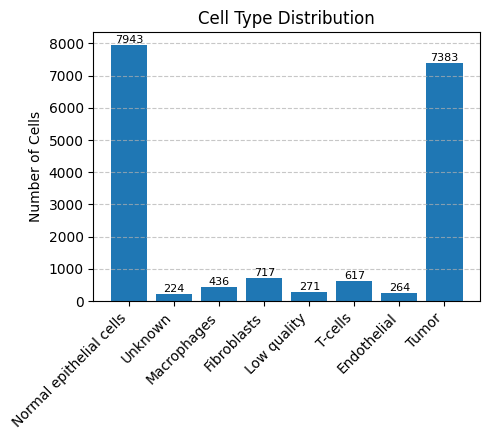

In [11]:
import matplotlib.pyplot as plt

# 데이터 정의
cell_types = [
    "Normal epithelial cells", "Unknown", "Macrophages", "Fibroblasts",
    "Low quality", "T-cells", "Endothelial", "Tumor"
]
counts = [7943, 224, 436, 717, 271, 617, 264, 7383]

# 그래프 그리기
plt.figure(figsize=(5, 4.5))
bars = plt.bar(cell_types, counts)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Cells")
plt.title("Cell Type Distribution")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom', fontsize=8)


plt.show()


In [64]:
adata = sc.read_h5ad("./raw_h5ad/downsampled_stable_52806.h5ad")
print(adata[adata.obs['cell_type.harmonized.cancer'] == 'Tumor'].shape[0])
print(adata[adata.obs['cell_type.harmonized.cancer'] == 'Normal epithelial cells'].shape[0])

14817
22940
